# 🚢 **Titanic survival prediction**
___

## 📃**The Problem** ##
This is the titanic problem. Let's see if Mary would have survived the Titanic, if she were aboard. A model will be built such that if provided the measured attributes for an arbitrary passenger, the model will predict to a significant accuracy if such passenger would have survived the Titanic.

⚙ **Setup**

In [72]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings


parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from _custom_func import load_data, extract_data
from titanic_module import age_map


sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
sklearn.set_config(display="diagram")


warnings.filterwarnings("ignore")

extract_data("../datasets/Titanic-Dataset.zip")

print("\n💯 😊 \033[034mSetup successfully loaded to memory.\033[om 💹")


💯 😊 Setup successfully loaded to memory.m 💹


## 📝 **Get the data**

The data is the famouus titanic dataset, downloaded as a zip file from 👉 [here](https://kagggke.com/). The function `extract_data` is used to extract the data into a `csv` saved in the `./data` directory.

In [2]:
def wrangle(path):
    df = load_data("./data/Titanic-Dataset.csv").set_index("PassengerId")
    df[["Not Survived"]] = (~df[["Survived"]].astype(bool)).astype(int)
    df["AgeCat"] = df.Age.fillna(-1).map(age_map)
    df["DockNumber"] = df["Cabin"].str[0]
    return df

In [3]:
df = wrangle("/data/Titanic-Dataset.csv")
df.head()


Data loaded successfully . . .


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Not Survived,AgeCat,DockNumber
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,youth,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,adult,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,young adult,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,adult,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,adult,NaN


## 🔎 **Observe the data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Embarked      889 non-null    object 
 11  Not Survived  891 non-null    int32  
 12  AgeCat        891 non-null    object 
 13  DockNumber    204 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(7)
memory usage: 100.9+ KB


Looking at the structure of the data, it is observed that there are 891 instances, which represent information about 891 passengers aboard. The age attribute of 177 passengers were missing. The cabin information of 687 passengers were missing. Other variables were completely recorded. The Embarked also have two missing values.

## 🔍 **Exploratory Data Analysis**

Doing some exploratory data analysis will reveal some pattern and insight from the dataset.

- Do more famale passengers survived the titannic than more male?

In [5]:
df.describe(include="all")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Not Survived,AgeCat,DockNumber
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889,891.000000,891,204
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3,NaN,8,8
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S,NaN,young adult,C
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644,NaN,201,59
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN,0.616162,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN,0.486592,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN,0.000000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,1.000000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000,NaN,NaN


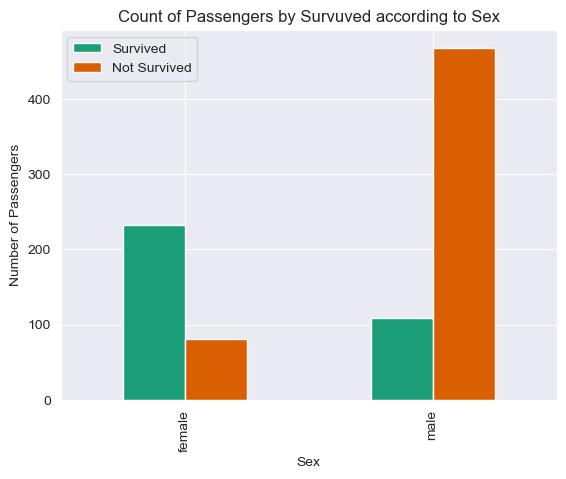

In [6]:
ax = df[["Sex", "Survived", "Not Survived"]].groupby("Sex").sum().plot(kind="bar", color=sns.palettes.mpl_palette('Dark2'))
ax.yaxis.set_label_text("Number of Passengers")
ax.set_title("Count of Passengers by Survuved according to Sex")
plt.show()

The chart reveals that a significant proportion of the female passengers survived the disastrer that the male passenger.

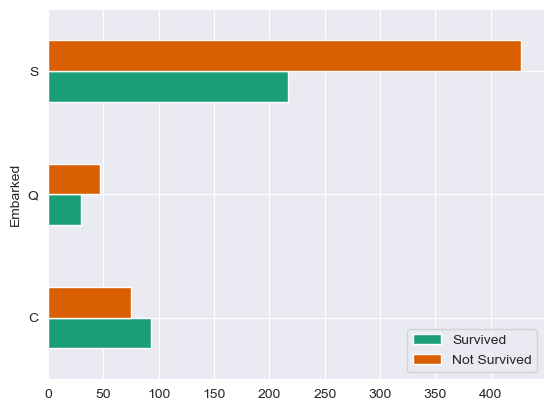

In [7]:
df[["Embarked", "Survived", "Not Survived"]].groupby('Embarked').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

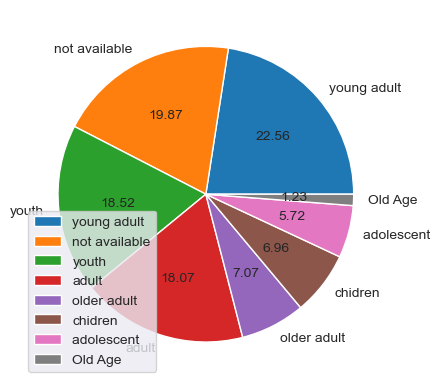

In [8]:
ax = df.AgeCat.value_counts().plot(kind="pie", ylabel="", autopct="%.2f")
ax.legend(loc="lower left")

<Axes: title={'center': 'Count of survivals by embarkation point.'}, xlabel='Number of Passengers', ylabel='Pclass'>

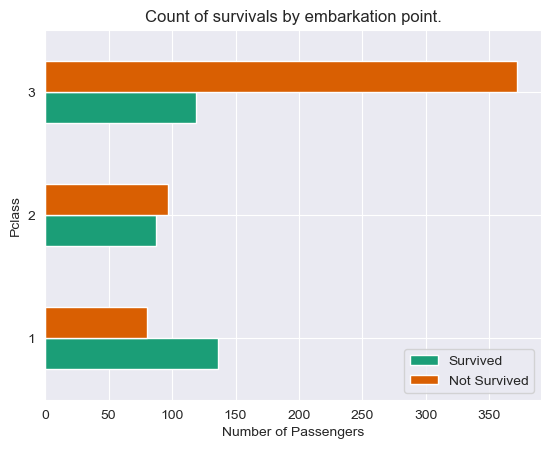

In [9]:
df[["Pclass", "Survived", "Not Survived"]].groupby("Pclass").sum()\
.plot(kind="barh", xlabel="Number of Passengers", title="Count of survivals by embarkation point.", color=sns.palettes.mpl_palette('Dark2'))

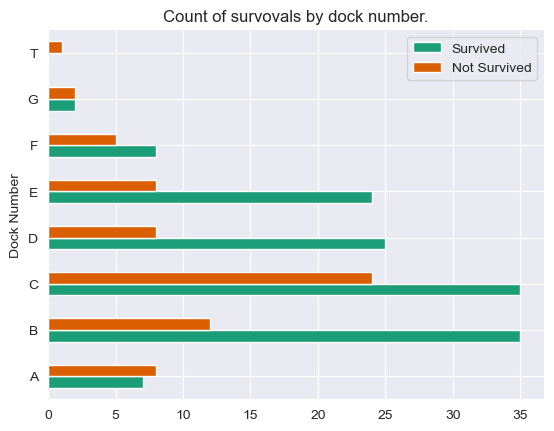

In [10]:
ax = df[["DockNumber", "Survived", "Not Survived"]].groupby('DockNumber').sum().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
ax.yaxis.set_label_text("Dock Number")
ax.set_title("Count of survovals by dock number.")
plt.show()

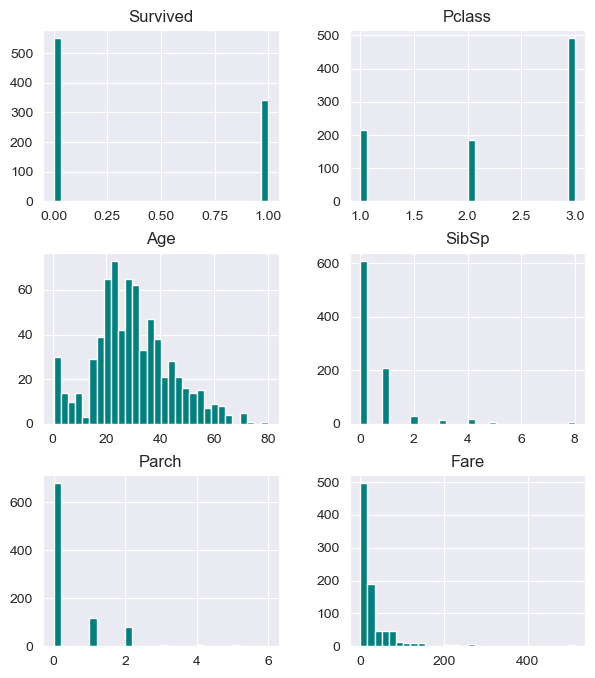

In [11]:
df.drop("Not Survived", axis=1).hist(bins=30, figsize=(7, 8), color="teal");

<Axes: >

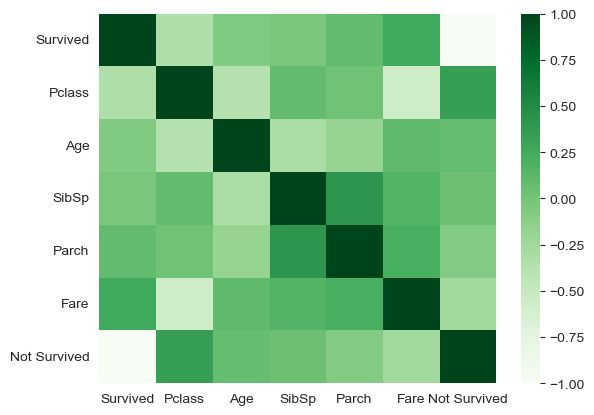

In [12]:
fig, ax = plt.subplots()
cor_mat = df.select_dtypes(include=np.number).corr()
sns.heatmap(cor_mat, cmap="Greens")

## 🛠 Prepare the data for machine learning

The dock number attribute has only one "T" value. This must be in the train set.
```python
X[X.DockNumber == "T"].index

# Return
569.6
```
Hence, this instance must be in the train set. The splitting has to be done carefully.

In [51]:
# Split the data
X = df.drop(["Survived", "Not Survived", "Ticket", "Cabin", "Name", "Pclass"], axis=1)
y = df["Survived"]

X_train, y_train = X[:570], y[:570]
X_val, y_val = X[570: 740], y[570: 740]
X_test, y_test = X[740:], y[740:]

In [52]:
num_attributes = X.select_dtypes(include=[np.number]).columns
cat_attributes = X.select_dtypes(include=object).columns

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder()
)

preprocessing = ColumnTransformer([
    ("numerical", num_pipeline, num_attributes),
    ("categorical", cat_pipeline, cat_attributes)
])

### Baseline
For the classification baselinne model, all instances belong to the most requent class. In this case, the negatuve class.

In [53]:
y_pred_baselinne = [y_train.value_counts().sort_values().tail(1).index[0] for i in range(len(y_train))]
accuracy_score(y_pred_baselinne, y_train)

0.6105263157894737

For the baseline model, an accuracy of 62.7% was obtainned. So, every other non-naive model must produce an accuracy score greater than thiis.

### Logistic Regression

In [54]:
model_lr = Pipeline([
    ("preprocessing", preprocessing),
    ("logisticregression", LogisticRegression(max_iter=1000))
])

model_lr.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'SibSp', 'Parch', 'Fare'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Sex', 'Embarked', 'AgeCat', 'DockNumber'], dtype='object'))])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

#### Evaluate

In [71]:
train_accuracy = accuracy_score(y_train, model_lr.predict(X_train))
validation_accuracy = accuracy_score(y_val, model_lr.predict(X_val))
test_accuracy = accuracy_score(y_test, model_lr.predict(X_test))

print(f"    Traing Accuracy: { train_accuracy.round(2) }")
print(f"Validation Accuracy: { validation_accuracy.round(2) }")
print(f"      Test Accuracy: { test_accuracy.round(2) }")

    Traing Accuracy: 0.81
Validation Accuracy: 0.78
      Test Accuracy: 0.82


The model seems not to fit the data appropriately. A tunning of hyperparameter is required.

In [ ]:
LogisticRegression()

___
Muyiwa J. Obadara | March 2024 Codesoft Internship